In [2]:
#Must have
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Bereinigung

In [4]:
#laden
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df = df.drop(["customerID"], axis=1)

In [7]:
df.shape

(7043, 20)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isna().sum()

11

In [13]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

In [15]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce').fillna(df["MonthlyCharges"] * df["tenure"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df[df["tenure"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


<Axes: >

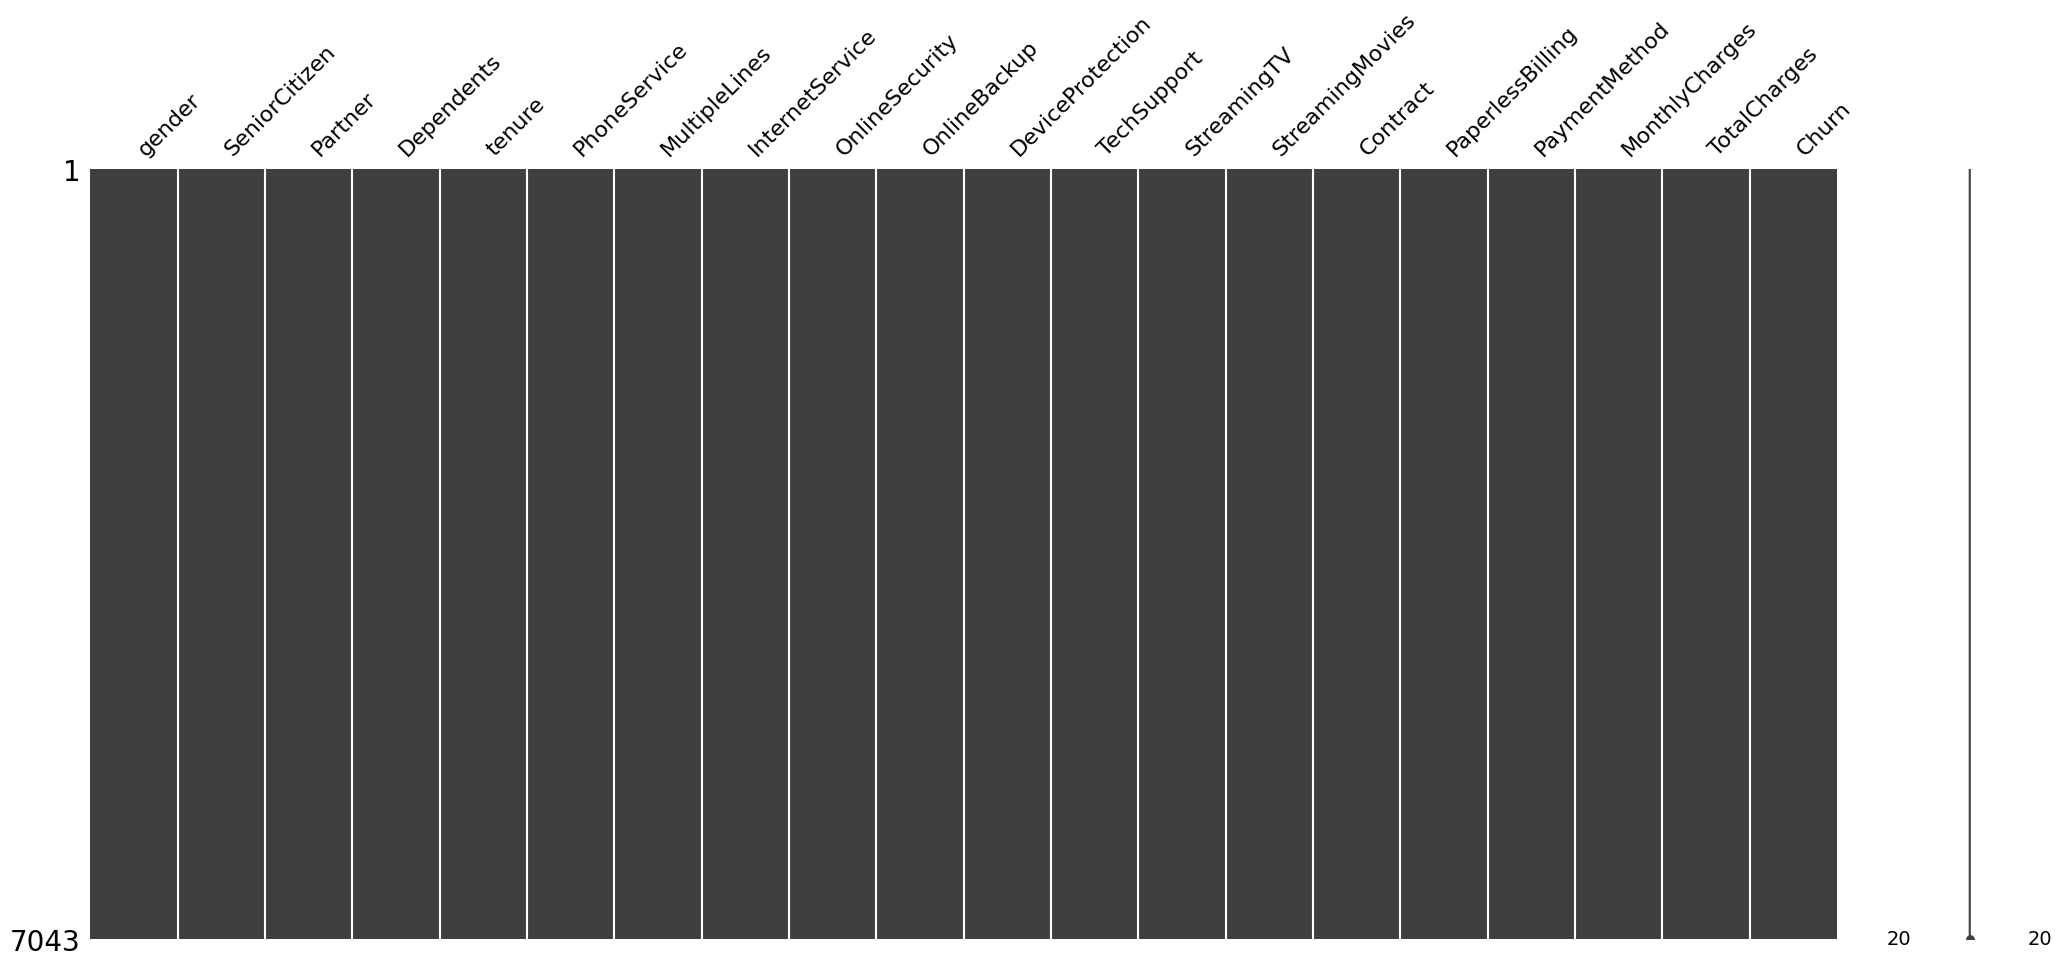

In [19]:
#Fehlende Daten als Diagram
msno.matrix(df)

In [20]:
df_dummies = df.copy()
#Convert Churn yes, no to 0 and 1 (only for early corr)
df_dummies["Churn"].replace({"Yes":1, "No":0})

#Make dummies out of unique dates
df_dummies = pd.get_dummies(df_dummies)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True


In [21]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,False,True,False,True,False,True,...,True,False,False,True,False,False,False,True,True,False
7039,0,72,103.20,7362.90,True,False,False,True,False,True,...,True,False,False,True,False,True,False,False,True,False
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7041,1,4,74.40,306.60,False,True,False,True,True,False,...,False,False,False,True,False,False,False,True,False,True


## Corrmap für Arme

<Axes: >

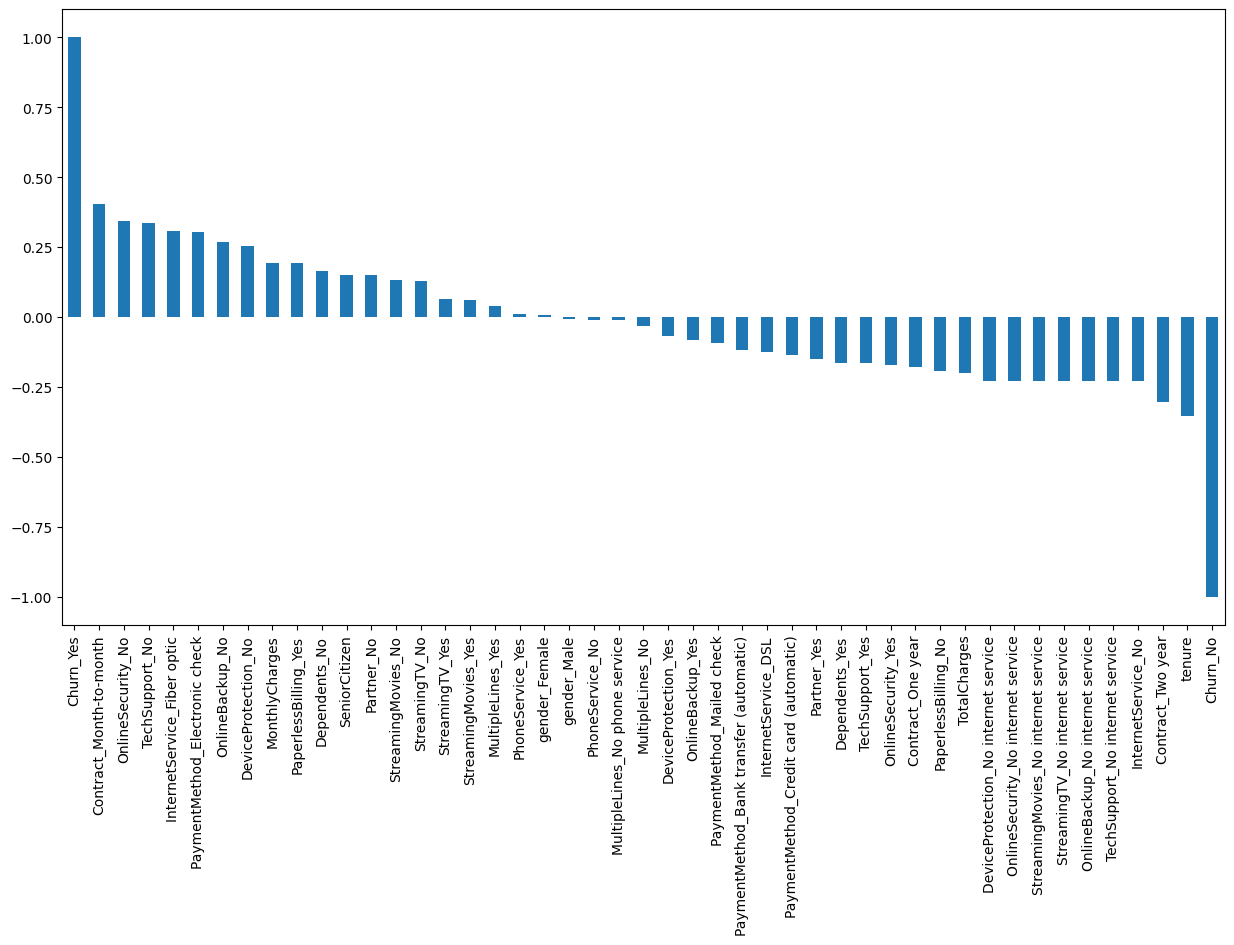

In [22]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

# Bearbeitung

In [23]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Visualisierung
## Churn

<Axes: ylabel='Contract'>

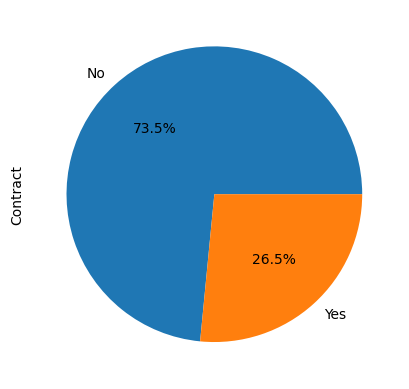

In [25]:
churncount = df.groupby(["Churn"]).count()
churncount["Contract"].plot.pie(autopct='%1.1f%%')

In [26]:
gender_churn_no = df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()
gender_churn_no

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [27]:
gender_chrun_yes = df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()
gender_chrun_yes

gender
Female    939
Male      930
Name: Churn, dtype: int64

## Churn Gender

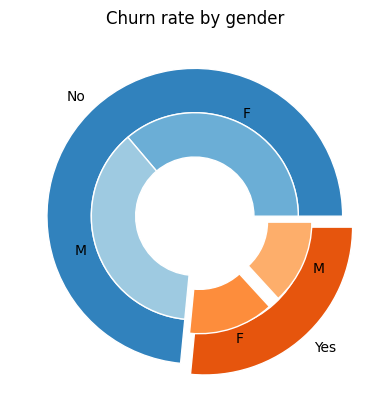

In [28]:
fig, ax = plt.subplots()
size = 0.3
vals = np.array ([[gender_churn_no.iloc[0],gender_churn_no.iloc[1]],[gender_chrun_yes.iloc[0],gender_chrun_yes.iloc[1]]])
labels =["No","Yes"]
labels_inner = ["F","M","F","M"]
explode_outer = (0, 0.1)
explode_inner =  (0, 0, 0.1, 0.1)

cmap= plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1),labels=labels, radius=1, colors=outer_colors, explode=explode_outer,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(),labels=labels_inner, radius=1-size, colors=inner_colors, explode=explode_inner,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Churn rate by gender')
plt.show()


In [29]:
pv_churn_contract = df.pivot_table(index="Churn", columns="Contract", values="tenure", aggfunc=("count"))
pv_churn_contract

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [30]:
pv_churn_contract.loc[("No"),("Month-to-month")]

2220

## Churn Contract Type

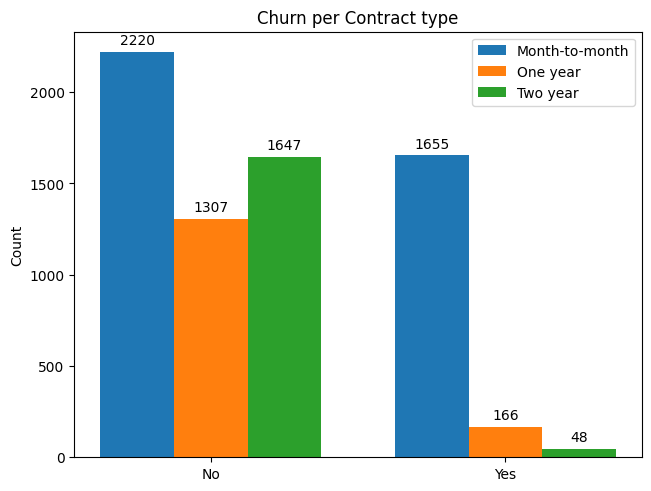

In [31]:
x = np.arange(len(pv_churn_contract.index))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for contract in pv_churn_contract.columns:
    offset = width * multiplier
    rects = ax.bar(x + offset, pv_churn_contract.loc[pv_churn_contract.index,contract], width, label=contract)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Churn per Contract type')
ax.set_xticks(x + width, pv_churn_contract.index)
ax.legend()

plt.show()


In [32]:
df_churned = df.query('Churn == "Yes"')
df_churned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [33]:
df_churned.query('Contract == "Month-to-month"')["tenure"]

2        2
4        2
5        8
8       28
13      49
        ..
7018     1
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1655, dtype: int64

## Churn by Contract Type by tenure

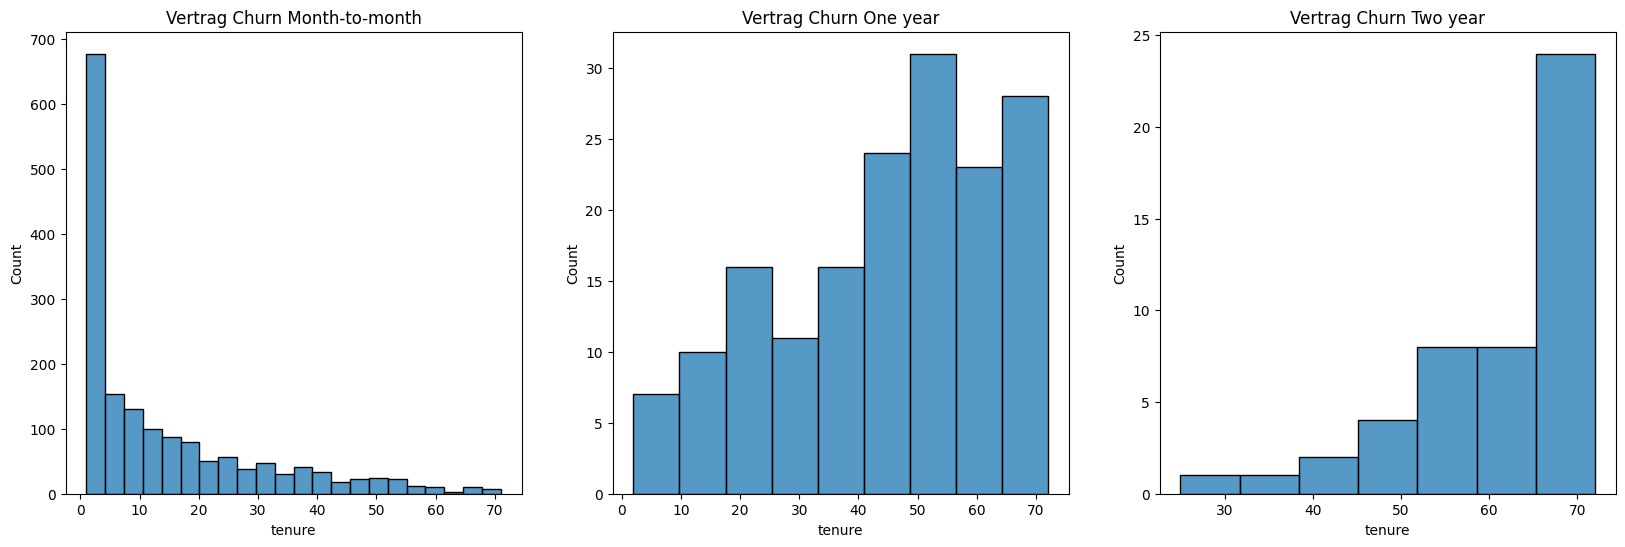

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20,6))
ax = sns.histplot(df_churned.query('Contract == "Month-to-month"')["tenure"], ax=ax1).set(title='Vertrag Churn Month-to-month')
ax = sns.histplot(df_churned.query('Contract == "One year"')["tenure"], ax=ax2).set(title='Vertrag Churn One year')
ax = sns.histplot(df_churned.query('Contract == "Two year"')["tenure"], ax=ax3).set(title='Vertrag Churn Two year')

In [35]:
pv_churn_payment = df.pivot_table(index="Churn", columns="PaymentMethod", values="tenure", 
                                  aggfunc=("count"), margins=True, margins_name='Sum')
pv_churn_payment = pv_churn_payment.iloc[:,:-1] #Remove Sum Column
pv_churn_payment = pv_churn_payment.sort_values(by=["Sum"], axis=1, ascending=False) # Sort by Column Sum
pv_churn_payment = pv_churn_payment.drop("Sum", axis=0) #Remove Sum row
pv_churn_payment

PaymentMethod,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
Churn,,,,
No,1294,1304,1286,1290
Yes,1071,308,258,232


## Churn Payment Method

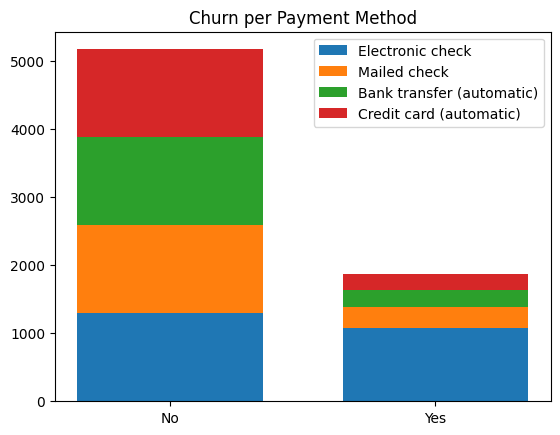

In [36]:
width = 0.7  # the width of the bars

fig, ax = plt.subplots()
bottom = np.zeros(2)

x = pv_churn_payment.index

for contract in pv_churn_payment.columns:
    p = ax.bar(x, pv_churn_payment.loc[pv_churn_payment.index,contract], width, 
               label=contract, bottom=bottom)
    bottom += pv_churn_payment.loc[pv_churn_payment.index,contract]

ax.set_title("Churn per Payment Method")
ax.legend(loc="upper right")




## Churn by tenure

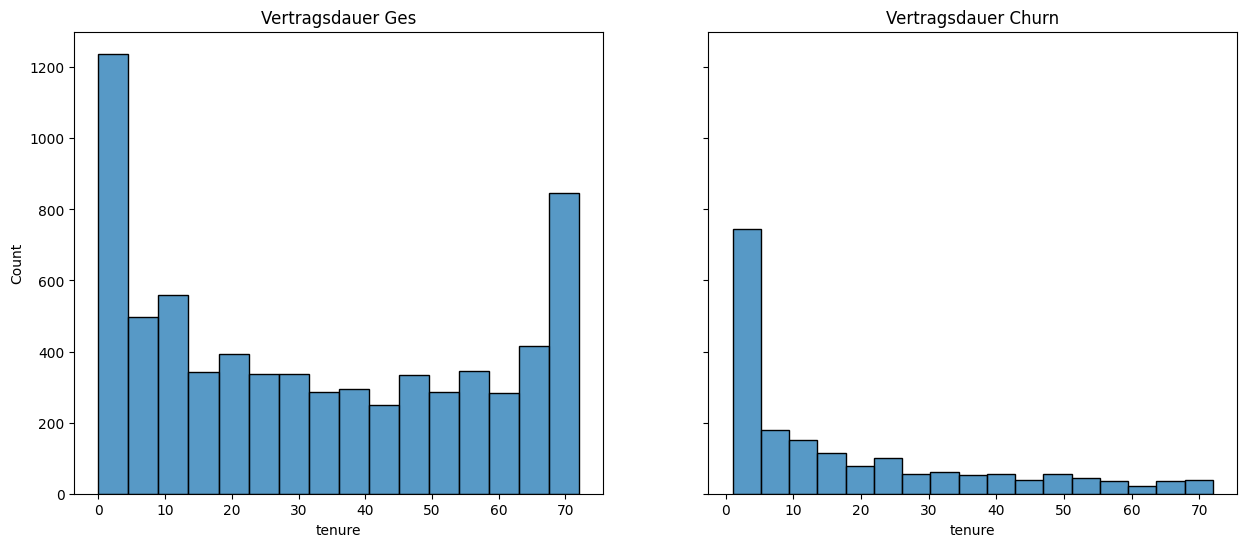

In [37]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = (15,6))
ax = sns.histplot(df["tenure"], ax=ax1).set(title='Vertragsdauer Ges')
ax = sns.histplot(df_churned["tenure"], ax=ax2).set(title='Vertragsdauer Churn')

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Churn by Services

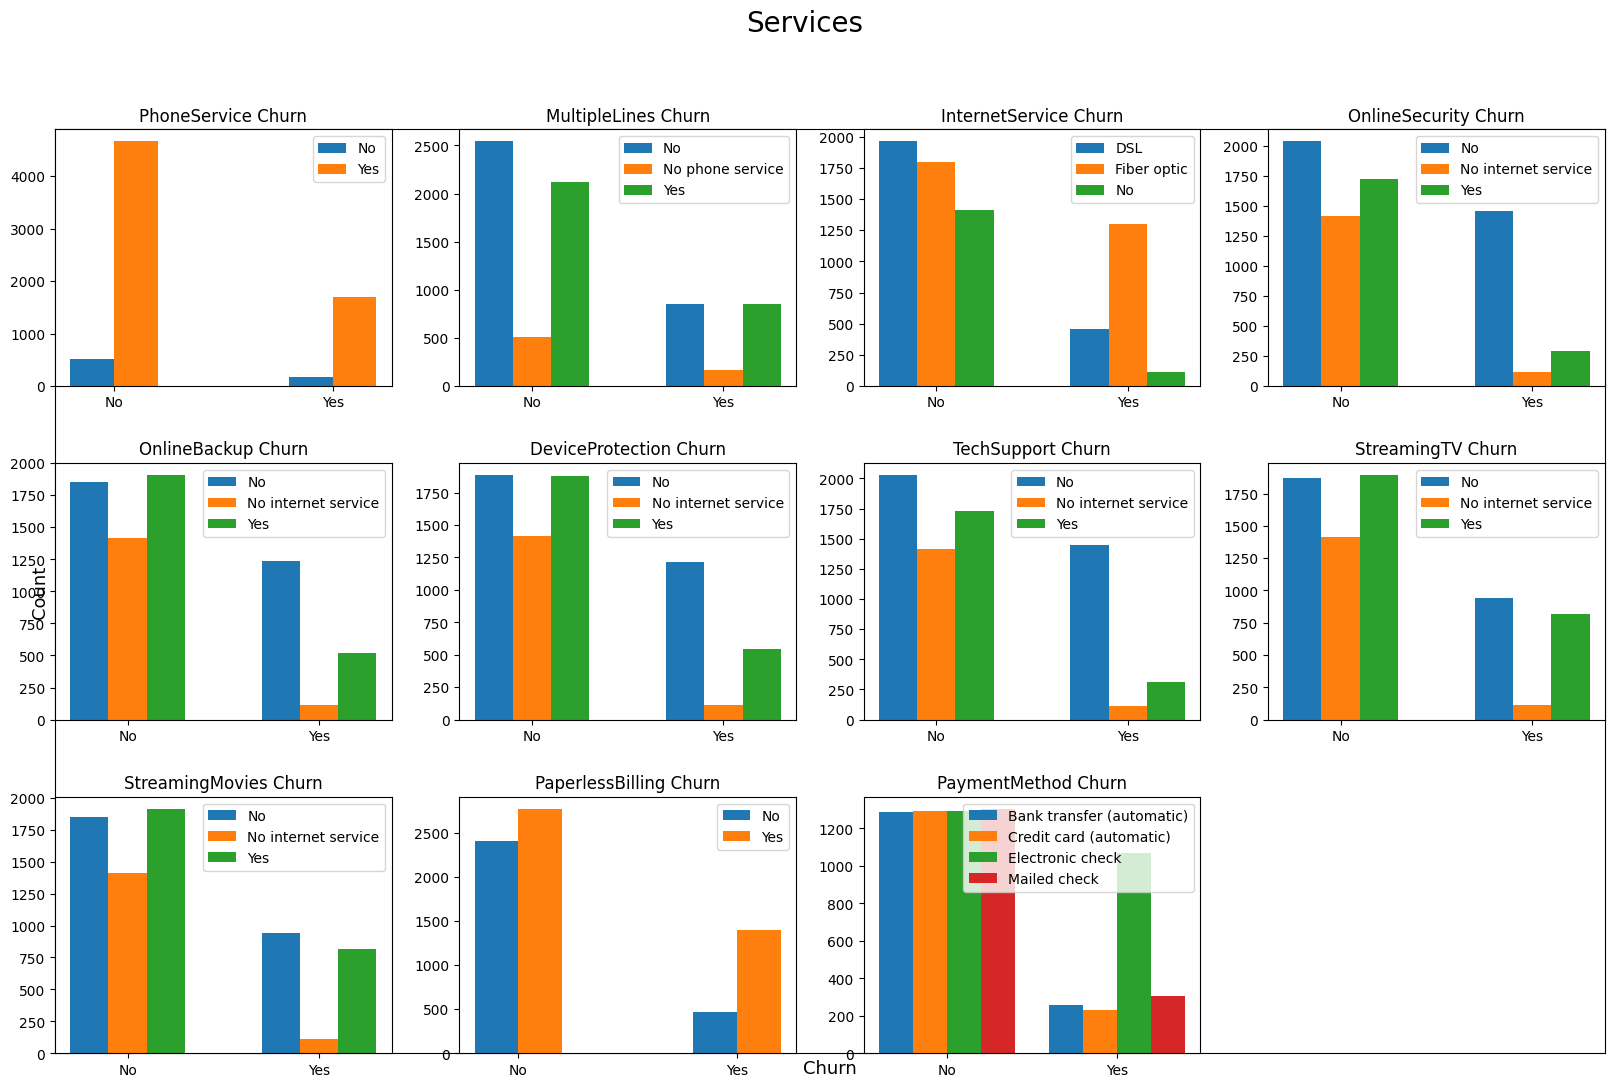

In [39]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'PaperlessBilling','PaymentMethod']

plt.figure(figsize=(20, 12))
plt.suptitle("Services", fontsize=20)
plt.xlabel("Churn", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.subplots_adjust(hspace=0.3)
plt.yticks([])
plt.xticks([])

for c, service in enumerate(services, 1):
    plt.subplot(3, 4, c)
    
    # Pivot table
    pv_services = df.pivot_table(index="Churn", columns=service, values="tenure", aggfunc="count")

    # Plot
    x = np.arange(len(pv_services.index))
    width = 0.2
    for j, col in enumerate(pv_services.columns):
        offset = (j - len(pv_services.columns) / 2) * width
        plt.bar(x + offset, pv_services[col], width, label=col)
    
    plt.title(f"{service} Churn")
    plt.xticks(x-width/2, pv_services.index)
    plt.legend()


plt.show()


## Churn by Pricing

Text(0.5, 1.0, 'Vert. Churn in Rahmen der mon. Kosten')

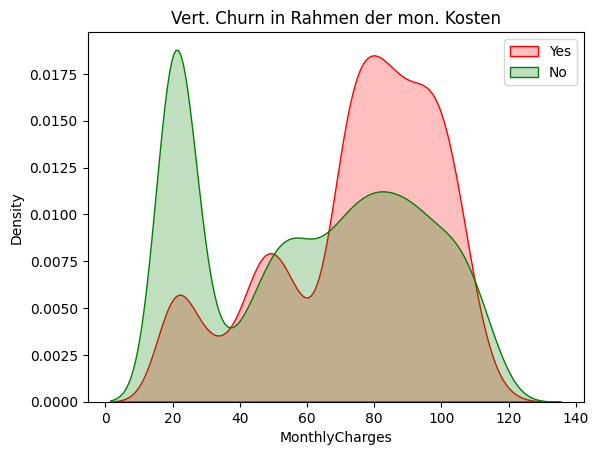

In [40]:

ax = sns.kdeplot(df.query('Churn == "Yes"')["MonthlyCharges"], fill=True, label="Yes", color="red")
ax = sns.kdeplot(df.query('Churn == "No"')["MonthlyCharges"], fill=True, label="No", color="green")
ax.legend()
ax.set_title("Vert. Churn in Rahmen der mon. Kosten")

In [41]:
#df_scaplma = df_churned.loc[["tenure","MonthlyCharges",""]]

In [42]:
#plt.figure(figsize=[10,8])
#sns.heatmap(df_dummies.corr(), cmap="coolwarm", annot=True,fmt=".2f" )
#plt.show()

# DF ML Preprocessing

In [43]:
df_pp = df.copy()
df_pp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
df_pp.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
df_pp_col = []

for c, col in enumerate(df_pp):
    print(f"{df_pp.columns[c]} : {df_pp[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.

In [46]:
yn_cols = ['SeniorCitizen', 'Partner', 'Dependents','PhoneService','PaperlessBilling', 'Churn','MultipleLines',
           'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']

for col in yn_cols:
    df_pp[col]= df_pp[col].map({"No": 0, "Yes": 1, "No internet service" : 0, "No phone service" : 0})

df_pp['gender'] = df_pp['gender'].map({'Female' : 1, 'Male' : 0})
df_pp['Contract'] = df_pp['Contract'].map({'Month-to-month' : 1, 'One year' : 12, 'Two year' : 24 })
df_pp.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,1,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,12,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,1,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,12,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,1,1,Electronic check,70.70,151.65,1
5,1,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,1,1,Electronic check,99.65,820.50,1
6,0,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,1,1,Credit card (automatic),89.10,1949.40,0
7,1,0,0,0,10,0,0,DSL,1,0,0,0,0,0,1,0,Mailed check,29.75,301.90,0
8,1,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,1,1,Electronic check,104.80,3046.05,1
9,0,0,0,1,62,1,0,DSL,1,1,0,0,0,0,12,0,Bank transfer (automatic),56.15,3487.95,0


In [47]:
df_pp = pd.get_dummies(df_pp, columns=["InternetService", "PaymentMethod"])
df_pp.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [48]:
df_pp.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [49]:
df_pp_chyes = df_pp[df_pp.Churn == 1]
df_pp_chyes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,True,False,False,False,False,False,True
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,False,True,False,False,False,True,False
5,1,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,False,True,False,False,False,True,False
8,1,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,False,True,False,False,False,True,False
13,0,0,0,0,49,1,1,0,1,1,...,103.70,5036.30,1,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,12,1,0,0,0,0,...,59.80,727.80,1,True,False,False,False,False,True,False
7026,1,0,0,0,9,1,0,0,0,0,...,44.20,403.35,1,True,False,False,True,False,False,False
7032,0,1,0,0,1,1,1,0,0,0,...,75.75,75.75,1,False,True,False,False,False,True,False
7034,1,0,0,0,67,1,1,1,1,1,...,102.95,6886.25,1,False,True,False,False,True,False,False


In [50]:
df_pp_chyes["Churn"].value_counts()

Churn
1    1869
Name: count, dtype: int64

In [51]:
df_pp_chyes.shape

(1869, 25)

In [52]:
df_pp_chno = df_pp[df_pp.Churn == 0]
df_pp_chno

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,True,False,False,True,False,False,False
6,0,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,False,True,False,False,True,False,False
7,1,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1,0,0,0,72,1,0,0,0,0,...,21.15,1419.40,0,False,False,True,True,False,False,False
7038,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,True,False,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,True,False,False,False,False,True,False


In [53]:
df_pp_chno["Churn"].value_counts()

Churn
0    5174
Name: count, dtype: int64

In [54]:
df_pp_chno.shape

(5174, 25)

## Corrtabelle Churn

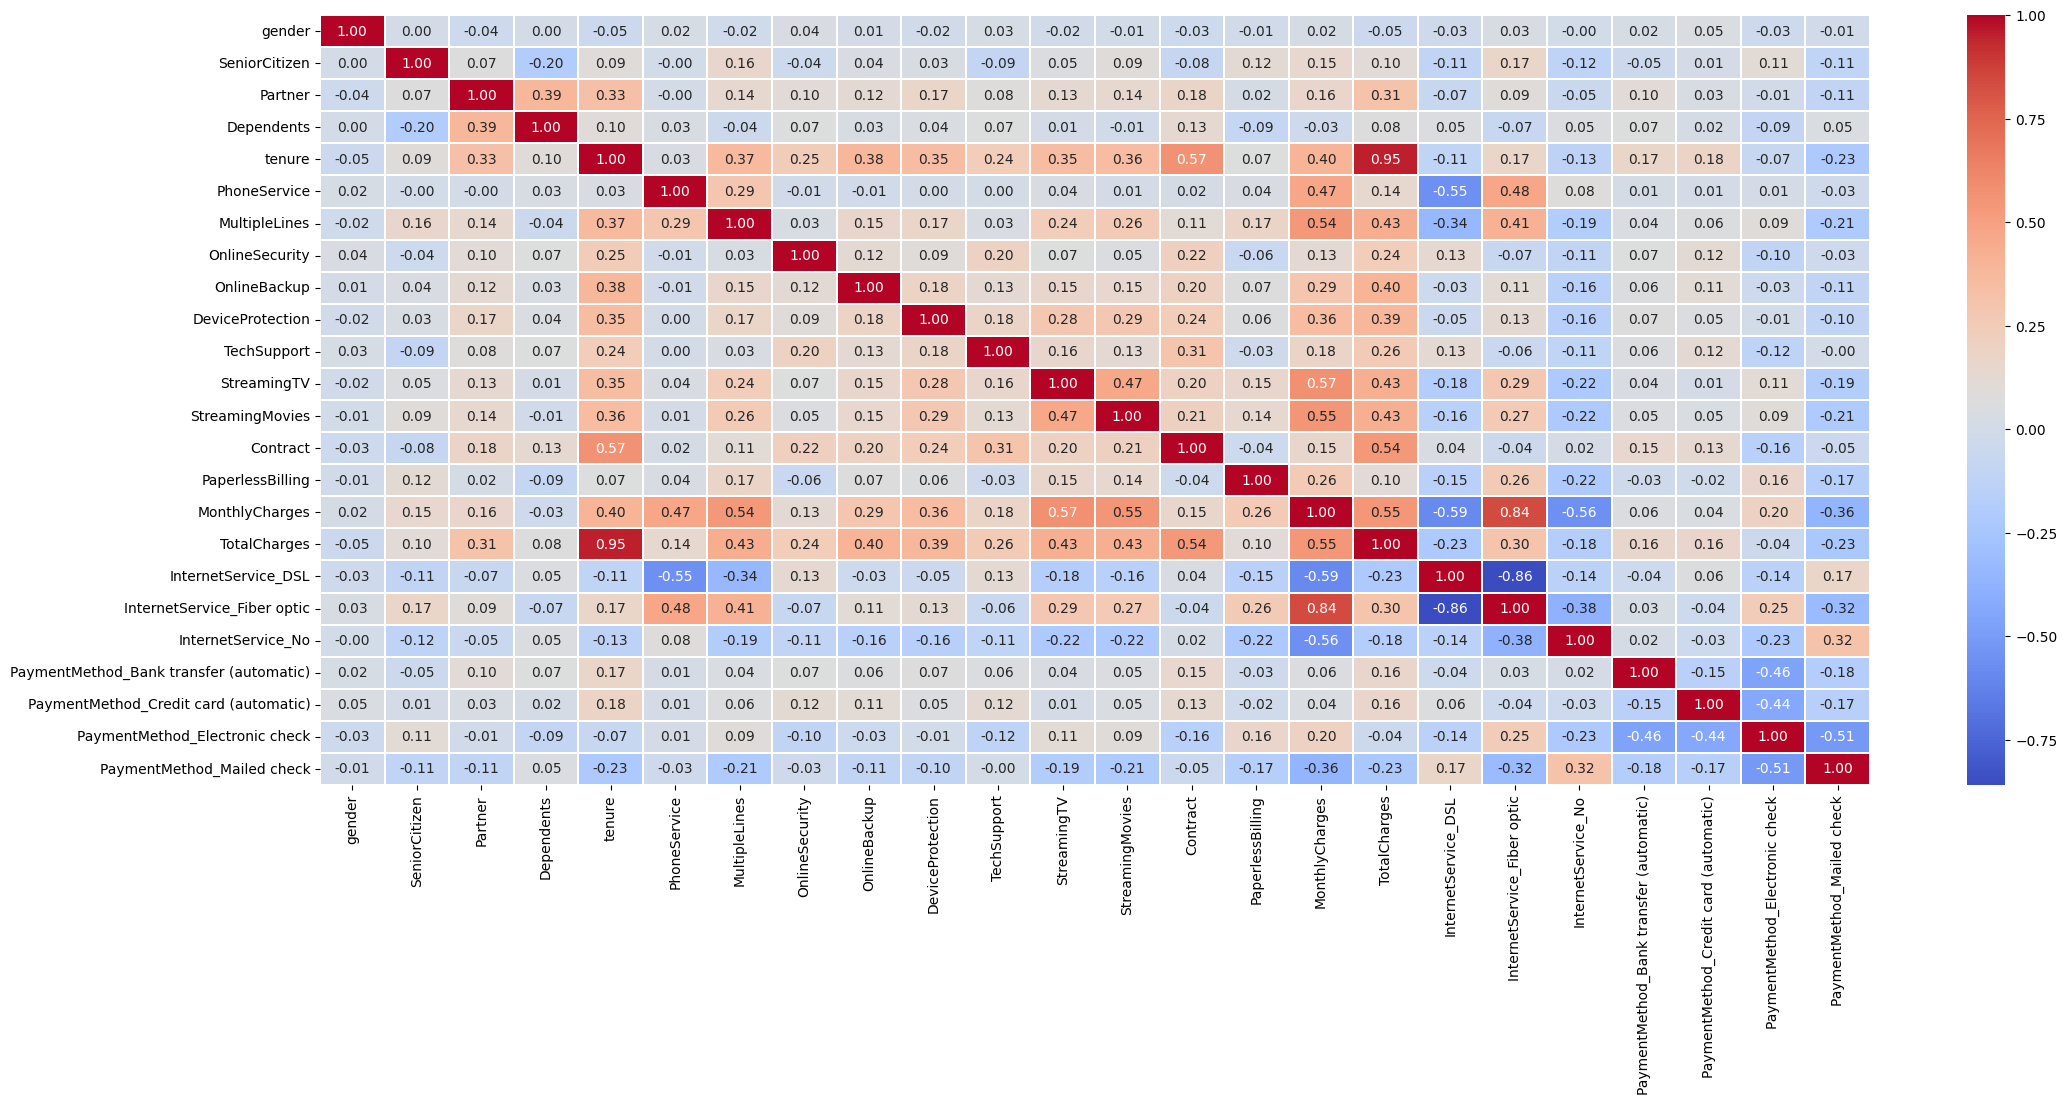

In [55]:
plt.figure(figsize=[25,10])
sns.heatmap(df_pp_chyes.drop("Churn", axis=1).corr(),linewidths=0.2, cmap="coolwarm", annot=True,fmt=".2f" )
plt.show()

# DF ML Preprocessing P2

In [56]:
#BIAS wegnehmen (nach ja nein splitten, und von beiden zB 100 nehmen), upsampling



In [57]:
#take 1869 random Churn 'no' samples (same No. as Churned costumers)
sample_df_pp_chno = df_pp_chno.sample(n=3500, random_state=42)

#Concat (fuze) the two Dataframes
df_pp_unbias = pd.concat([df_pp_chyes, sample_df_pp_chno], ignore_index=True)

df_pp_unbias["Churn"].value_counts()

Churn
0    3500
1    1869
Name: count, dtype: int64

In [58]:
# Input-/Output-Split
x = df_pp_unbias.drop("Churn", axis=1)
y = df_pp_unbias["Churn"].values

In [59]:
# Train-/Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [61]:
X_train.shape

(4295, 24)

In [62]:
X_test.shape

(1074, 24)

In [63]:
Y_train.shape

(4295,)

In [64]:
Y_test.shape

(1074,)

In [65]:
#X_test.to_csv("X_text.csv")

PermissionError: [Errno 13] Permission denied: 'X_text.csv'

In [ ]:
# Skalierung der Daten
#from sklearn.preprocessing import MinMaxScaler
#scaler_input  = MinMaxScaler()
#scaler_output = MinMaxScaler()

#scaler_input  = scaler_input.fit(X_train)
#scaler_output = scaler_output.fit(Y_train)

#X_train = scaler_input.transform(X_train)
#X_test  = scaler_input.transform(X_test)

#Y_train = scaler_output.transform(Y_train)
#Y_test  = scaler_output.transform(Y_test)

In [ ]:
#X_train_scaled

In [ ]:
#ML Util
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
sgd = linear_model.SGDClassifier(tol=None)
%time sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_test, Y_test)

acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)

print("Accuracy SGD: ", acc_sgd, "%")

CPU times: total: 234 ms
Wall time: 229 ms
Accuracy SGD:  72.91 %


In [ ]:
random_forest = RandomForestClassifier(n_estimators=500)
%time random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_test, Y_test)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

print("Accuracy Random Forest: ", acc_random_forest, "%")

CPU times: total: 3.31 s
Wall time: 3.37 s
Accuracy Random Forest:  77.37 %


Fehlerrate: 22.63%


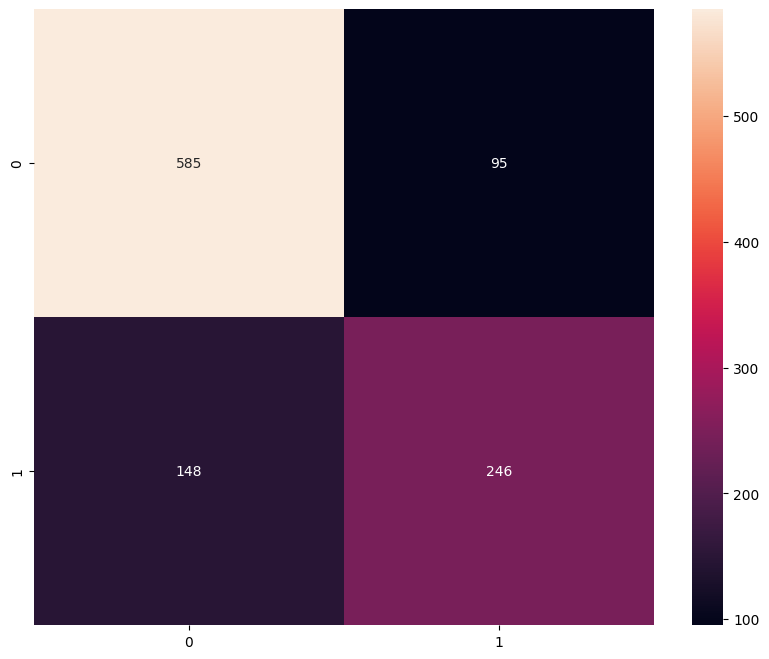

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

# Fehlerrate = 1 - Trefferrate
error_rate = 1.0 - accuracy_score(Y_test,Y_pred)
print("Fehlerrate: %.2f%%" % (error_rate*100))

# Konfusionsmatrix
result = confusion_matrix(Y_test,Y_pred) # Returns a ndarray
cm_df = pd.DataFrame(
    result, 
    index = [idx for idx in random_forest.classes_],
    columns = [col for col in random_forest.classes_])
plt.figure(figsize = (10,8)) # sets plot size
sns.heatmap(cm_df, annot=True,fmt='d') # creates heat map
plt.show() # shows figure

In [ ]:
logreg = LogisticRegression()
%time logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

print("Accuracy Logistic Regression: ", acc_log, "%")

CPU times: total: 78.1 ms
Wall time: 61.2 ms
Accuracy Logistic Regression:  77.47 %


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
%time knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

print("Accuracy K Nearest Neighbhor: ", acc_knn, "%")

CPU times: total: 0 ns
Wall time: 8.97 ms
Accuracy K Nearest Neighbhor:  70.58 %


In [ ]:
gaussian = GaussianNB() 
%time gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)

print("Accuracy Gaussian Naive Bayes: ", acc_gaussian, "%")

CPU times: total: 15.6 ms
Wall time: 4.01 ms
Accuracy Gaussian Naive Bayes:  76.16 %


In [ ]:
perceptron = Perceptron(max_iter=500)
%time perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)

print("Accuracy Perceptron: ", acc_perceptron, "%")

CPU times: total: 15.6 ms
Wall time: 12 ms
Accuracy Perceptron:  41.62 %


In [ ]:
linear_svc = LinearSVC()
%time linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)

print("Accuracy Linear Support Vector Machine: ", acc_linear_svc, "%")

C:\Users\hubner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\hubner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 188 ms
Wall time: 196 ms
Accuracy Linear Support Vector Machine:  62.76 %


In [ ]:
decision_tree = DecisionTreeClassifier() 
%time decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

print("Accuracy Decision Tree: ", acc_decision_tree, "%")

CPU times: total: 46.9 ms
Wall time: 42 ms
Accuracy Decision Tree:  69.83 %


In [ ]:
xgbcla = XGBClassifier()
%time xgbcla.fit(X_train, Y_train)
Y_pred = xgbcla.predict(X_test)  
acc_xgbcla = round(xgbcla.score(X_test, Y_test) * 100, 2)

print("Accuracy Decision Tree: ", acc_xgbcla, "%")

CPU times: total: 562 ms
Wall time: 114 ms
Accuracy Decision Tree:  75.51 %


In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree','XGBoost'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree,acc_xgbcla]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
77.47,Logistic Regression
77.37,Random Forest
76.16,Naive Bayes
75.51,XGBoost
72.91,Stochastic Gradient Decent
70.58,KNN
69.83,Decision Tree
62.76,Support Vector Machines
41.62,Perceptron


In [ ]:
import pickle
#datei = open(f"telco_churn_{str(random_forest)}.pkl", "wb") # w wie write, b wie binary
#pickle.dump(random_forest, datei)
#datei.close()